In [94]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from pandas_profiling import ProfileReport

from collections import OrderedDict

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import os

import scipy.stats as ss
from scipy.stats import chi2_contingency

## 1.Предобработка данных

In [85]:
os.chdir('/home/axolotlove/R/Jupyter/HW_4/')

In [86]:
beans = pd.read_csv('soybean-large_data.csv')

In [87]:
beans

,name,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,2-4-d-injury,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?
303,herbicide-injury,1,1,?,0,?,1,0,?,?,...,?,?,3,?,?,?,?,?,?,1
304,herbicide-injury,0,1,?,0,?,0,3,?,?,...,?,?,3,?,?,?,?,?,?,1
305,herbicide-injury,1,1,?,0,?,0,0,?,?,...,?,?,3,?,?,?,?,?,?,1


Все наблюдения, содержащие пропущенные значения, мы удаляем.

In [88]:
for colname in beans.columns:
    beans.drop(beans[beans[colname] == '?'].index, inplace=True)

/home/axolotlove/.local/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [89]:
beans

,name,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,frog-eye-leaf-spot,5,1,2,1,0,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
286,frog-eye-leaf-spot,4,0,2,2,0,1,3,1,1,...,0,0,1,1,0,0,0,0,0,0
287,frog-eye-leaf-spot,5,0,2,1,0,1,2,0,0,...,0,0,1,1,0,0,0,0,0,0
288,frog-eye-leaf-spot,5,0,2,2,0,2,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [90]:
beans.dtypes

name               object
date               object
plant-stand        object
precip             object
temp               object
hail               object
crop-hist          object
area-damaged       object
severity           object
seed-tmt           object
germination        object
plant-growth       object
leaves              int64
leafspots-halo     object
leafspots-marg     object
leafspot-size      object
leaf-shread        object
leaf-malf          object
leaf-mild          object
stem               object
lodging            object
stem-cankers       object
canker-lesion      object
fruiting-bodies    object
external decay     object
mycelium           object
int-discolor       object
sclerotia          object
fruit-pods         object
fruit spots        object
seed               object
mold-growth        object
seed-discolor      object
seed-size          object
shriveling         object
roots              object
dtype: object

Как видно, большинство параметров в датасете категориальные. Для проверки корреляции между ними мы будем
пользоваться критерием корреляции Краммера.

In [91]:
categories = list(beans.columns)
categories.remove('leaves')
data_encoded = beans[categories]

In [92]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [95]:
rows = []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
df


,name,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,plant-growth,leafspots-halo,leafspots-marg,leafspot-size,leaf-shread,leaf-malf,leaf-mild,stem,lodging,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
name,1.00,0.17,0.27,0.52,0.30,0.18,0.06,0.22,0.39,0.08,0.06,0.68,0.76,0.90,0.90,0.45,0.28,1.00,0.69,0.17,0.59,0.60,0.52,0.57,0.19,1.00,1.00,0.81,0.70,0.69,0.68,0.55,0.40,0.38,0.30
date,0.17,1.00,0.10,0.04,0.08,0.02,0.02,0.04,0.10,0.05,0.01,0.14,0.05,0.06,0.05,0.08,0.02,0.03,0.07,0.02,0.16,0.05,0.05,0.03,0.02,0.04,0.03,0.22,0.09,0.03,0.00,0.05,0.03,0.07,0.03
plant-stand,0.27,0.10,0.98,0.03,0.06,0.00,0.02,0.05,0.04,0.01,0.17,0.02,0.01,0.01,0.02,0.00,0.00,0.02,0.00,0.00,0.12,0.05,0.01,0.00,0.00,0.04,0.02,0.13,0.04,0.01,0.00,0.03,0.00,0.00,0.02
precip,0.52,0.04,0.03,1.00,0.00,0.03,0.02,0.04,0.10,0.01,0.01,0.03,0.10,0.10,0.09,0.02,0.01,0.06,0.07,0.02,0.07,0.11,0.04,0.10,0.00,0.32,0.23,0.05,0.04,0.03,0.03,0.02,0.01,0.01,0.02
temp,0.30,0.08,0.06,0.00,1.00,0.01,0.03,0.04,0.10,0.01,0.01,0.11,0.05,0.06,0.06,0.05,0.00,0.03,0.02,0.02,0.12,0.04,0.04,0.01,0.05,0.02,0.03,0.14,0.10,0.01,0.01,0.01,0.02,0.01,0.01
hail,0.18,0.02,0.00,0.03,0.01,0.98,0.03,0.01,0.00,0.00,0.01,0.04,0.02,0.03,0.04,0.00,0.01,0.01,0.01,0.11,0.02,0.04,0.00,0.00,0.00,0.02,0.01,0.01,0.02,0.02,0.01,0.04,0.00,0.00,0.00
crop-hist,0.06,0.02,0.02,0.02,0.03,0.03,1.00,0.08,0.03,0.01,0.02,0.01,0.01,0.02,0.02,0.01,0.00,0.00,0.03,0.01,0.02,0.01,0.02,0.00,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.02,0.00,0.01,0.01
area-damaged,0.22,0.04,0.05,0.04,0.04,0.01,0.08,1.00,0.05,0.04,0.01,0.06,0.04,0.03,0.03,0.04,0.04,0.01,0.01,0.00,0.09,0.04,0.02,0.04,0.02,0.04,0.03,0.15,0.03,0.02,0.01,0.00,0.01,0.02,0.02
severity,0.39,0.10,0.04,0.10,0.10,0.00,0.03,0.05,1.00,0.00,0.01,0.24,0.08,0.08,0.09,0.02,0.01,0.01,0.14,0.00,0.18,0.06,0.03,0.11,0.06,0.04,0.03,0.21,0.18,0.03,0.03,0.08,0.01,0.01,0.01
seed-tmt,0.08,0.05,0.01,0.01,0.01,0.00,0.01,0.04,0.00,1.00,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.02,0.02,0.00,0.04,0.03,0.02,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00


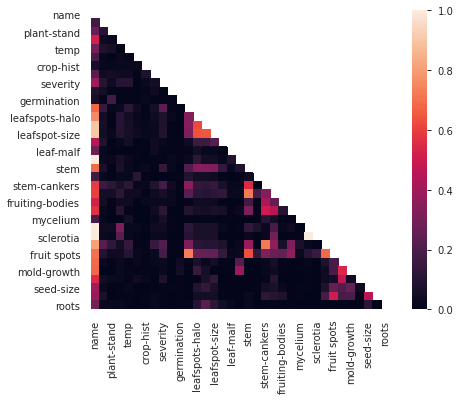

In [20]:
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

На графике и из матриц видно, что помимо names высокие показатели корреляции с другими параметрами демонстрируют
fruit spots и stem, поэтому мы их исключаем из датасета.

In [96]:
beans.drop(['fruit spots', 'stem'], axis=1)

,name,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,plant-growth,leaves,leafspots-halo,leafspots-marg,leafspot-size,leaf-shread,leaf-malf,leaf-mild,lodging,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,0,1,1,0,2,2,0,0,0,1,3,1,1,1,0,0,0,0,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,1,1,1,0,2,2,0,0,0,0,3,1,1,1,0,0,0,0,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,2,1,1,0,2,2,0,0,0,0,3,0,1,1,0,0,0,0,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,1,1,1,0,2,2,0,0,0,0,3,0,1,1,0,0,0,0,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,2,1,1,0,2,2,0,0,0,0,3,1,1,1,0,0,0,0,0,0,0,0,0,0
5,diaporthe-stem-canker,5,0,2,1,0,3,0,1,0,1,1,1,0,2,2,0,0,0,0,3,0,1,1,0,0,0,0,0,0,0,0,0,0
6,diaporthe-stem-canker,5,0,2,1,0,2,0,1,1,0,1,1,0,2,2,0,0,0,1,3,1,1,1,0,0,0,0,0,0,0,0,0,0
7,diaporthe-stem-canker,4,0,2,1,1,1,0,1,0,2,1,1,0,2,2,0,0,0,0,3,1,1,1,0,0,0,0,0,0,0,0,0,0
8,diaporthe-stem-canker,6,0,2,1,0,3,0,1,1,1,1,1,0,2,2,0,0,0,0,3,1,1,1,0,0,0,0,0,0,0,0,0,0
9,diaporthe-stem-canker,4,0,2,1,0,2,0,2,0,2,1,1,0,2,2,0,0,0,0,3,1,1,1,0,0,0,0,0,0,0,0,0,0


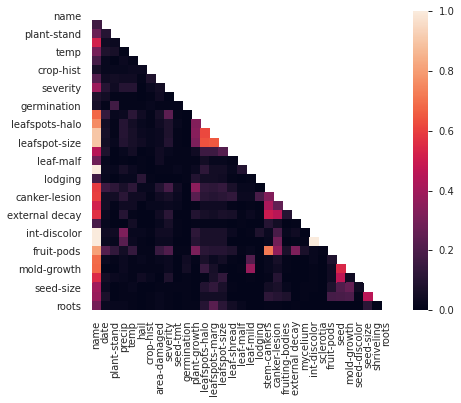

In [99]:
categories.remove('fruit spots')
categories.remove('stem')
data_encoded = beans[categories]

rows = []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

## 2/3. Разделение датасета (разделение информации о принадлежности к классам)

In [100]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  
from sklearn import metrics

In [101]:
y = beans.name

In [102]:
X = beans.drop(['name'], axis=1)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, shuffle=True, random_state=0)

Для разделения исходной выборки на тренировочный и тестовый датасеты я использовал train_test_split с параметром
stratify=y, чтобы полученные выборки имели то же распределение классов, как и изначальный датасет. Далее Random
Forest был выбран с параметрами n_estimators = 300 , max_depth = 15.

## 4. Обучение классификатора

In [109]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators': range(100, 300), 'max_depth': range(1,16)}
rf = RandomForestClassifier(n_estimators = 300 , max_depth = 15)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## 5. Предсказания классификатора

In [105]:
predictions = rf.predict(X_test)
predictions

array(['phytophthora-rot', 'bacterial-blight', 'frog-eye-leaf-spot',
       'bacterial-pustule', 'anthracnose', 'anthracnose', 'anthracnose',
       'alternarialeaf-spot', 'anthracnose', 'frog-eye-leaf-spot',
       'phyllosticta-leaf-spot', 'powdery-mildew', 'alternarialeaf-spot',
       'diaporthe-stem-canker', 'phytophthora-rot', 'charcoal-rot',
       'downy-mildew', 'bacterial-blight', 'brown-stem-rot',
       'anthracnose', 'diaporthe-stem-canker', 'diaporthe-stem-canker',
       'brown-spot', 'alternarialeaf-spot', 'powdery-mildew',
       'phytophthora-rot', 'brown-stem-rot', 'alternarialeaf-spot',
       'frog-eye-leaf-spot', 'brown-stem-rot', 'alternarialeaf-spot',
       'anthracnose', 'brown-spot', 'alternarialeaf-spot', 'brown-spot',
       'brown-spot', 'alternarialeaf-spot', 'downy-mildew',
       'rhizoctonia-root-rot', 'phytophthora-rot', 'alternarialeaf-spot',
       'brown-spot', 'alternarialeaf-spot', 'diaporthe-stem-canker',
       'downy-mildew', 'brown-spot', 'br

Полученный классификатор предсказывает класс объекта на основании тестовых параметров из X_test.
Полученные предсказания мы сравниваем с реальными данными y_test для нахождения метрик качества.

## 6. Метрики качества классификатора

In [69]:
print(metrics.classification_report(y_test, predictions))

                        precision    recall  f1-score   support

   alternarialeaf-spot       0.63      0.92      0.75        13
           anthracnose       1.00      1.00      1.00         7
      bacterial-blight       1.00      0.75      0.86         4
     bacterial-pustule       1.00      1.00      1.00         3
            brown-spot       0.86      0.92      0.89        13
        brown-stem-rot       1.00      1.00      1.00         7
          charcoal-rot       1.00      1.00      1.00         3
 diaporthe-stem-canker       1.00      1.00      1.00         4
          downy-mildew       1.00      1.00      1.00         3
    frog-eye-leaf-spot       0.89      0.62      0.73        13
phyllosticta-leaf-spot       1.00      0.50      0.67         4
      phytophthora-rot       1.00      1.00      1.00         5
        powdery-mildew       1.00      1.00      1.00         3
     purple-seed-stain       1.00      1.00      1.00         3
  rhizoctonia-root-rot       1.00      

F-метрика - это гармоническое среднее между полностой (recall) и точностью (precision), что помогает нам
одновременно оценивать эти параметры. Для данного предиктора половина классов имеет F=1, другая половина имеет F<1
вплоть до 0.67.

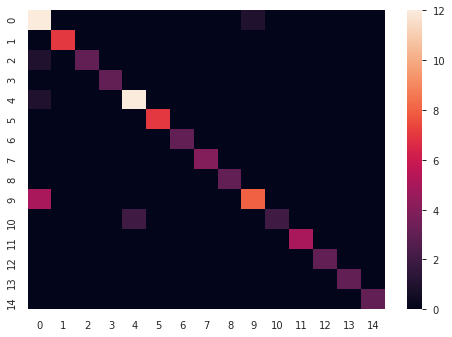

In [70]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, predictions)
sns.heatmap(conf_mat)
plt.show()

Матрица неточностей соотносит реальные значения y_test по оси y и предсказанные по оси х. Диагональ на графике 
отображает вероятность правильно определить y для классификатора. Данный классификатор имеет выраженную диагональ, при этом низкая частота определения некоторых классов скорее обусловлена из количеством в тестовой выборке.

## 7. Значимость признаков

In [120]:
feature_importances = rf.feature_importances_

In [121]:
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': feature_importances})

In [123]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
0,date,0.088935
14,leafspot-size,0.056358
21,canker-lesion,0.055424
27,fruit-pods,0.054555
28,fruit spots,0.051556
12,leafspots-halo,0.051116
20,stem-cankers,0.049391
2,precip,0.045543
13,leafspots-marg,0.043113
6,area-damaged,0.040483


Наиболее важными при классификации оказались признаки date, leafspot-size и canker-lesion.

## 8. Подбор оптимальных параметров классификатора

Пакет GridSearchCV сравнивает метрики качества классификаторов с параметрами, заданными в определенном 

In [114]:
grid_search_clf_rf = GridSearchCV(rf, parameters, cv=5, n_jobs=6)

In [115]:
grid_search_clf_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=15,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score=False,
                                              random_

In [116]:
grid_search_clf_rf.best_params_

{'max_depth': 12, 'n_estimators': 218}

In [ ]:
GridSearchCV определил оптимальные настройки классификатора как 'max_depth': 12, 'n_estimators': 218.

In [117]:
predictions_grid = grid_search_clf_rf.predict(X_test)
predictions_grid

array(['phytophthora-rot', 'bacterial-blight', 'frog-eye-leaf-spot',
       'bacterial-pustule', 'anthracnose', 'anthracnose', 'anthracnose',
       'alternarialeaf-spot', 'anthracnose', 'frog-eye-leaf-spot',
       'phyllosticta-leaf-spot', 'powdery-mildew', 'alternarialeaf-spot',
       'diaporthe-stem-canker', 'phytophthora-rot', 'charcoal-rot',
       'downy-mildew', 'bacterial-blight', 'brown-stem-rot',
       'anthracnose', 'diaporthe-stem-canker', 'diaporthe-stem-canker',
       'brown-spot', 'alternarialeaf-spot', 'powdery-mildew',
       'phytophthora-rot', 'brown-stem-rot', 'alternarialeaf-spot',
       'frog-eye-leaf-spot', 'brown-stem-rot', 'alternarialeaf-spot',
       'anthracnose', 'brown-spot', 'alternarialeaf-spot', 'brown-spot',
       'brown-spot', 'alternarialeaf-spot', 'downy-mildew',
       'rhizoctonia-root-rot', 'phytophthora-rot', 'alternarialeaf-spot',
       'brown-spot', 'alternarialeaf-spot', 'diaporthe-stem-canker',
       'downy-mildew', 'brown-spot', 'br

In [118]:
print(metrics.classification_report(y_test, predictions_grid))

                        precision    recall  f1-score   support

   alternarialeaf-spot       0.63      0.92      0.75        13
           anthracnose       1.00      1.00      1.00         7
      bacterial-blight       1.00      0.75      0.86         4
     bacterial-pustule       1.00      1.00      1.00         3
            brown-spot       0.92      0.92      0.92        13
        brown-stem-rot       1.00      1.00      1.00         7
          charcoal-rot       1.00      1.00      1.00         3
 diaporthe-stem-canker       1.00      1.00      1.00         4
          downy-mildew       1.00      1.00      1.00         3
    frog-eye-leaf-spot       0.89      0.62      0.73        13
phyllosticta-leaf-spot       1.00      0.75      0.86         4
      phytophthora-rot       1.00      1.00      1.00         5
        powdery-mildew       1.00      1.00      1.00         3
     purple-seed-stain       1.00      1.00      1.00         3
  rhizoctonia-root-rot       1.00      

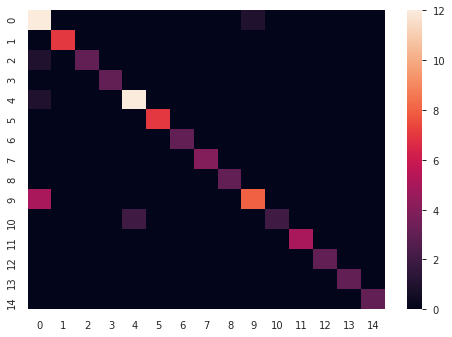

In [119]:
conf_mat_grid = confusion_matrix(y_test, predictions_grid)
sns.heatmap(conf_mat)
plt.show()

Мы получили более высокие показатели F-меры по всем классам для нового классификатора. Тем не менее, подбор оптимальных параметров значительно не увеличил число правильно определяемых классов на центральной жиагонали матрицы неточностей.